In [214]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## 데이터 불러오기

In [219]:
file_path = 'C:/Users/ASUS/Documents/kaggle data/IEEE-CIS Fraud Detection/ieee-fraud-detection'
trans_file_name = file_path + '/' + 'train_transaction.csv'
identity_file_name = file_path + '/' + 'train_identity.csv'
train_transaction = pd.read_csv(trans_file_name)
train_identity = pd.read_csv(identity_file_name)

train_data = pd.merge(train_transaction, train_identity, on = 'TransactionID', how = 'left')

In [220]:
train_data.head(n=10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## explanatory analytics

In [166]:
#변수의 갯수와 타입 확인
columns = list(train_data.columns)
print(len(columns))

columns_type = {}

for name in columns:
    columns_type.update({name : train_data[name].dtype})
columns_type

394


{'TransactionID': dtype('int64'),
 'isFraud': dtype('int64'),
 'TransactionDT': dtype('int64'),
 'TransactionAmt': dtype('float64'),
 'ProductCD': dtype('O'),
 'card1': dtype('int64'),
 'card2': dtype('float64'),
 'card3': dtype('float64'),
 'card4': dtype('O'),
 'card5': dtype('float64'),
 'card6': dtype('O'),
 'addr1': dtype('float64'),
 'addr2': dtype('float64'),
 'dist1': dtype('float64'),
 'dist2': dtype('float64'),
 'P_emaildomain': dtype('O'),
 'R_emaildomain': dtype('O'),
 'C1': dtype('float64'),
 'C2': dtype('float64'),
 'C3': dtype('float64'),
 'C4': dtype('float64'),
 'C5': dtype('float64'),
 'C6': dtype('float64'),
 'C7': dtype('float64'),
 'C8': dtype('float64'),
 'C9': dtype('float64'),
 'C10': dtype('float64'),
 'C11': dtype('float64'),
 'C12': dtype('float64'),
 'C13': dtype('float64'),
 'C14': dtype('float64'),
 'D1': dtype('float64'),
 'D2': dtype('float64'),
 'D3': dtype('float64'),
 'D4': dtype('float64'),
 'D5': dtype('float64'),
 'D6': dtype('float64'),
 'D7': dty

In [226]:
#결측이 있는 변수 확인
print(f'There are {train_data.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


0    569877
1     20663
Name: isFraud, dtype: int64


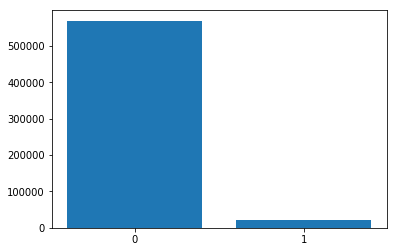

In [167]:
#target 변수의 비율 확인
target = train_data['isFraud']
target_counts = target.value_counts()
target_values = target.unique()
train_data = train_data.drop('isFraud', axis = 1)

plt.xticks(target_values)
plt.bar(target_values, target_counts)
print(target_counts) # -> 굉장히 불균형

## EDA

In [228]:
train_data['TransactionDT']

0            86400
1            86401
2            86469
3            86499
4            86506
5            86510
6            86522
7            86529
8            86535
9            86536
10           86549
11           86555
12           86564
13           86585
14           86596
15           86618
16           86620
17           86668
18           86725
19           86730
20           86761
21           86769
22           86786
23           86808
24           86821
25           86944
26           86945
27           86972
28           86973
29           86979
            ...   
590510    15810518
590511    15810549
590512    15810563
590513    15810575
590514    15810578
590515    15810589
590516    15810592
590517    15810626
590518    15810760
590519    15810774
590520    15810785
590521    15810802
590522    15810823
590523    15810833
590524    15810836
590525    15810866
590526    15810876
590527    15810883
590528    15810907
590529    15810912
590530    15810926
590531    15

## str 변수 numeric으로 바꿔주기

In [182]:
def str_to_num(data, columns_type):
    
    lb = LabelEncoder()
    
    for var_name, var_type in columns_type.items():
        if var_type == 'O':
            data[var_name] = lb.fit_transform(data[var_name].astype('str'))
            
    return data
            
train_numeric = str_to_num(train_transaction, columns_type)
train_numeric = train_numeric.fillna(train_numeric.mean())

## Data split

In [186]:
train_x, test_x, train_y, test_y = train_test_split(train_numeric, target, test_size = 0.2)

## RF classification

In [188]:
#모델 훈련
rf = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 1234)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=1234, verbose=0, warm_start=False)

In [194]:
#prediction
pred = rf.predict(test_x)
accuracy = accuracy_score(test_y, pred)

print('oob_score : ', rf.oob_score_)
print('accuracy : ', accuracy)

oob_score :  0.979724066108985
accuracy :  0.9801537575778101


## Ada Boost Classifier

In [215]:
ada_clf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth = 1), n_estimators = 200,
            algorithm = "SAMME.R", learning_rate = 0.5)
ada_clf.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [216]:
#prediction
pred = ada_clf.predict(test_x)
accuracy = accuracy_score(test_y, pred)

print('accuracy : ', accuracy)

accuracy :  0.972702949842517


## 제출용 데이터 불러오기

In [195]:
file_path = 'C:/Users/ASUS/Documents/kaggle data/IEEE-CIS Fraud Detection/ieee-fraud-detection'
trans_file_name = file_path + '/' + 'test_transaction.csv'
identity_file_name = file_path + '/' + 'test_identity.csv'
test_transaction = pd.read_csv(trans_file_name)

In [196]:
#데이터 정제
test_numeric = str_to_num(test_transaction, columns_type)
test_numeric = test_numeric.fillna(test_numeric.mean())

In [217]:
#훈련해 둔 모델로 pred
submit = ada_clf.predict(test_numeric)

In [218]:
#제출
submit_data = pd.DataFrame()
submit_data['TransactionID'] = test_numeric['TransactionID']
submit_data['isFraud'] = submit
submit_data.to_csv(file_path + '/' + "submission.csv", mode='w')